#1. Install Python Packages

In [ ]:
# Packages / libraries
import os #provides functions for interacting with the operating system
import numpy as np 
np.set_printoptions(formatter={'float_kind':'{:f}'.format})
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from math import sqrt
%matplotlib inline
from datetime import date
import datetime as dt
from dateutil.relativedelta import relativedelta
import pickle

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 
warnings.filterwarnings("ignore", category=FutureWarning) 
warnings.filterwarnings("ignore", category=UserWarning) 

from sklearn import metrics 
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, explained_variance_score, confusion_matrix, accuracy_score, classification_report, log_loss,  mean_squared_error
from sklearn.feature_selection import RFE
from sklearn.model_selection import StratifiedKFold, cross_val_score, GridSearchCV

#2. Load Dataset and Exploratory Data Analysis (EDA)

In [ ]:
# Loading the data into a dataframe
df = pd.read_csv('IST3244_Assignment2_Dataset.csv', index_col='RowNumber')\
    .drop(['Surname', 'CustomerId'], axis=1)

# View the number of variables and observations of the listings dataset.
print('Number of variables/column: {}'.format(df.shape[1]))
print('Number of observations/rows: {}'.format(df.shape[0]))
print("\n")

df.head(10)

Number of variables/column: 11
Number of observations/rows: 10000




,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,
1,619,France,Female,42,2,0.00,1,1,1,101348.88,1
2,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
3,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
4,699,France,Female,39,1,0.00,2,0,0,93826.63,0
5,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
6,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
7,822,France,Male,50,7,0.00,2,1,1,10062.80,0
8,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
9,501,France,Male,44,4,142051.07,2,0,1,74940.50,0


In [ ]:
# Checking for null values

df.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 1 to 10000
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 937.5+ KB


In [ ]:
# Investigate all the elements whithin each Feature 
#How many unique values are they , and what are they  ? 

#efficient and scalable way
for column in df:
    unique_values = np.unique(df[column])
    unique_count = len(unique_values)
    if unique_count <= 10:
        print("The number of values for feature {} is: {} -- {}".format(column, unique_count, unique_values))
    else:
        print("The number of values for feature {} is: {}".format(column, unique_count))

The number of values for feature CreditScore is: 460
The number of values for feature Geography is: 3 -- ['France' 'Germany' 'Spain']
The number of values for feature Gender is: 2 -- ['Female' 'Male']
The number of values for feature Age is: 70
The number of values for feature Tenure is: 11
The number of values for feature Balance is: 6382
The number of values for feature NumOfProducts is: 4 -- [1 2 3 4]
The number of values for feature HasCrCard is: 2 -- [0 1]
The number of values for feature IsActiveMember is: 2 -- [0 1]
The number of values for feature EstimatedSalary is: 9999
The number of values for feature Exited is: 2 -- [0 1]


In [ ]:
#view the distribution of the columns
df.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


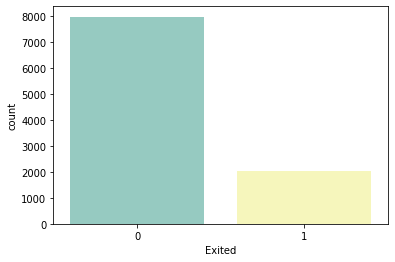

In [ ]:
# Investigating the distr of y

sns.countplot(x = 'Exited', data = df, palette = 'Set3')

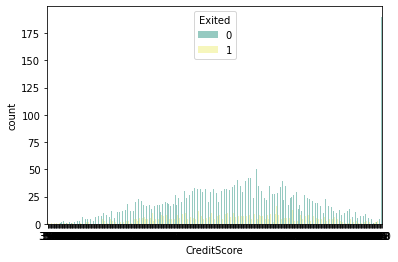

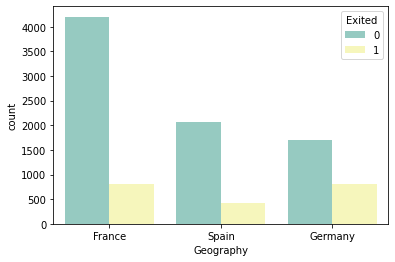

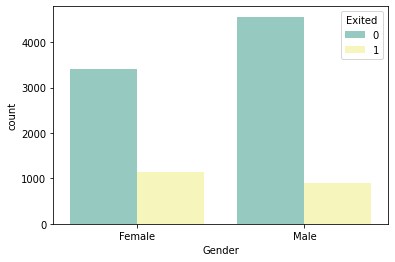

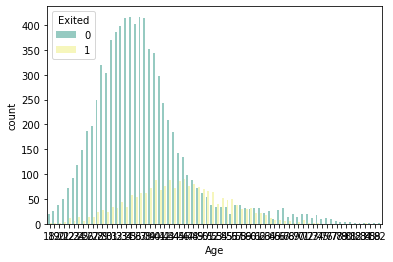

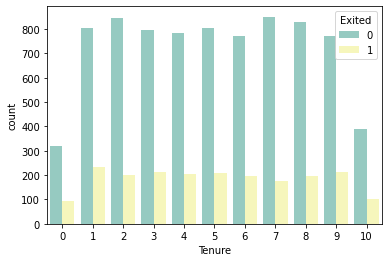

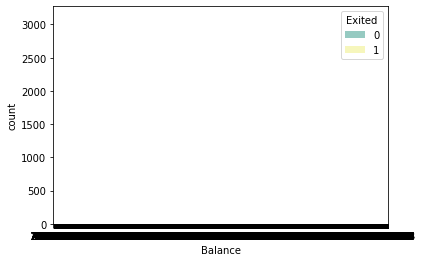

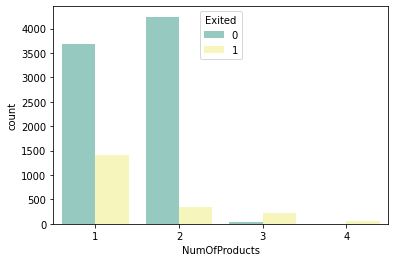

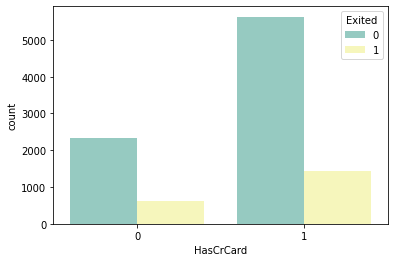

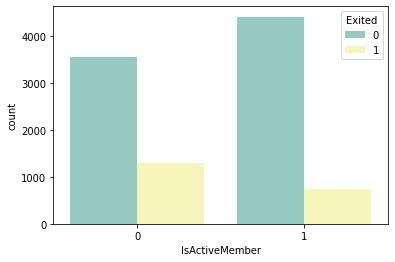

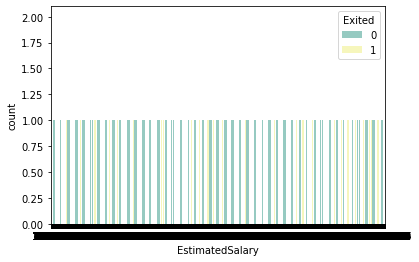

In [ ]:
# Looping through all the features by our y variable - see if there is relationship

features = ['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure',
       'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary']

for f in features:
    sns.countplot(x = f, data = df, palette = 'Set3', hue =  'Exited')
    plt.show()

#3. Data Cleaning

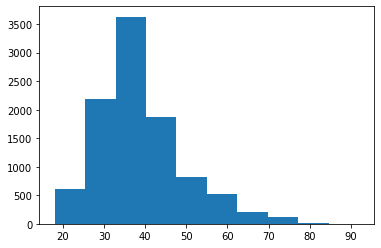

In [ ]:
#Since age is skewed to the right from  before, lets analyse further
# Histogram for age 
fig, ax= plt.subplots()
ax = plt.hist(df['Age'])
plt.show()

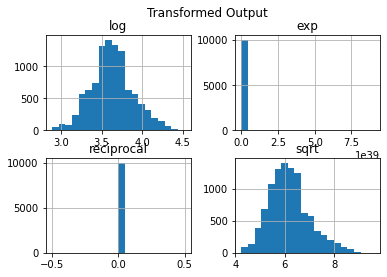

In [ ]:
#apply transformation to age
age1 = df['Age'].transform([np.log, np.exp, np.reciprocal, np.sqrt])

#Seeing which transformation is the best
age1.hist(bins=20)
plt.suptitle('Transformed Output')
plt.show()

In [ ]:
#change age to the tranformation you have choosen
df['Age'] = df['Age'].transform([np.log])


> 3.1 Feature Engineering

*   3.1.1 Credit Score grouping ( min= 358 and max= 800)



In [ ]:
def credit_score_table(row):
    
    credit_score = row.CreditScore
    if credit_score >= 300 and credit_score < 500:
        return "Very_Poor"
    elif credit_score >= 500 and credit_score < 601:
        return "Poor"
    elif credit_score >= 601 and credit_score < 661:
        return "Fair"
    elif credit_score >= 661 and credit_score < 781:
        return "Good"
    elif credit_score >= 851:
        return "Top"
    elif credit_score >= 781 and credit_score < 851:
        return "Excellent"
    elif credit_score < 300:
        return "Deep"



*   3.1.2 Product utilization RATE by YEAR









In [ ]:
def product_utilization_rate_by_year(row):
    number_of_products = row.NumOfProducts
    tenure = row.Tenure
    
    if number_of_products == 0:
        return 0
    
    if tenure == 0:
        return number_of_products
    
    rate = number_of_products / tenure
    return rate


*   3.1.3 According to countries monthly average salaries





In [ ]:
def countries_monthly_average_salaries(row):
   
    fr = 3696    
    de = 4740
    sp = 2257
    salary = row.EstimatedSalary / 12
    country = row.Geography              # Germany, France and Spain
    
    if country == 'Germany':
        return salary / de
    elif country == "France":
        return salary / fr
    elif country == "Spain": 
        return salary / sp


*   3.1.4 The main Feature Engineering





In [ ]:
def feature_engineering(df, is_show_graph = False):
    df_fe = df.copy()
    
    # balance_salary_rate
    balance_salary_rate = 'balance_salary_rate'
    df_fe[balance_salary_rate] = df_fe.Balance / df_fe.EstimatedSalary
    
    # product_utilization_rate_by_year
    df_fe = df_fe.assign(product_utilization_rate_by_year=df_fe.apply(lambda x: product_utilization_rate_by_year(x), axis=1)) 

    # Standardizing and rating tenure_rate_by_age - removing the adolescence/young customers
    tenure_rate_by_age = 'tenure_rate_by_age'
    df_fe[tenure_rate_by_age] = df_fe.Tenure / (df_fe.Age-17)
    
    # Standardizing and rating credit_score_rate_by_age - removing the adolescence/young customers
    credit_score_rate_by_age = 'credit_score_rate_by_age'
    df_fe[credit_score_rate_by_age] = df_fe.CreditScore / (df_fe.Age-17)
   
    # credit_score_rate_by_salary = Ratio of CreditScore & EstimatedSalary
    credit_score_rate_by_salary = 'credit_score_rate_by_salary'
    df_fe[credit_score_rate_by_salary] = df_fe.CreditScore / (df_fe.EstimatedSalary)
    

    #Feature Eng. show the graphs of the generated variables according to the dependent variable?
    if is_show_graph:
        fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (20,12))
        fig.tight_layout()
        sns.boxplot(y = balance_salary_rate, x = dependent_variable_name, hue = dependent_variable_name, data = df_fe, ax = axes[0][0])
        sns.boxplot(y = product_utilization_rate_by_year, x = dependent_variable_name, hue = dependent_variable_name, data = df_fe, ax = axes[0][1])
        #sns.countplot(x = credit_score_rate_by_age, hue = dependent_variable_name, data = df_fe, ax = axes[1][0])
        #sns.countplot(x = credit_score_rate_by_age, hue = dependent_variable_name, data = df_fe, ax = axes[1][1])
        plt.ylim(-1, 5)
    
    
    #feature engineering add - credit_score_table
    df_fe = df_fe.assign(credit_score_table=df_fe.apply(lambda x: credit_score_table(x), axis=1))
    
    #feature engineering add - countries_monthly_average_salaries
    df_fe = df_fe.assign(countries_monthly_average_salaries = df_fe.apply(lambda x: countries_monthly_average_salaries(x), axis=1)) 
    
    return df_fe



> 3.2 Data Encoding



In [ ]:

def data_encoding(df):
    df_model = df.copy()
    '''
    # It was attempted to reduce the number of 0 observations.
    churn_zero = df_model[df_model.apply(lambda x: True if x['Exited'] == 0 else False , axis=1)]
    df_train = churn_zero.sample(frac=0.1,random_state=100)
    df_model = df_model.drop(df_train.index)
    '''
    
    
    # >>>> Categorical columns <<<<<
    
    non_encoding_columns = ["Geography","HasCrCard","IsActiveMember","Gender","NumOfProducts","Tenure","credit_score_table"]
    
    df_non_encoding = df_model[non_encoding_columns]
    df_model = df_model.drop(non_encoding_columns,axis=1)
    
    
    df_encoding = df_non_encoding.copy()
    
    from sklearn.preprocessing import LabelEncoder
    encoder = LabelEncoder()
    df_encoding["gender_category"] = encoder.fit_transform(df_non_encoding.Gender)
    df_encoding["country_category"] = encoder.fit_transform(df_non_encoding.Geography)
    df_encoding["credit_score_category"] = encoder.fit_transform(df_non_encoding.credit_score_table)

    

    df_encoding.reset_index(drop=True, inplace=True)
    df_model.reset_index(drop=True, inplace=True)
    df_model = pd.concat([df_model,df_encoding],axis=1)

    df_model = df_model.drop(["Geography","Gender","credit_score_table","CreditScore","EstimatedSalary"],axis=1)
    df_model = df_model.reset_index()
    df_model = df_model.drop('index',axis=1)
    
    df_model.loc[df_model.HasCrCard == 0, 'credit_card_situation'] = -1
    df_model.loc[df_model.IsActiveMember == 0, 'is_active_member'] = -1
    return df_model



> 3.3 Apply Feature Engineering and Encoding to Original Dataset 



In [ ]:
# Let's see after feature engineering:

df_fe = feature_engineering(df)
df_fe.head(3)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,balance_salary_rate,product_utilization_rate_by_year,tenure_rate_by_age,credit_score_rate_by_age,credit_score_rate_by_salary,credit_score_table,countries_monthly_average_salaries
RowNumber,,,,,,,,,,,,,,,,,,
1,619,France,Female,3.737670,2,0.00,1,1,1,101348.88,1,0.000000,0.500,-0.150803,-46.673547,0.006108,Fair,2.285103
2,608,Spain,Female,3.713572,1,83807.86,1,0,1,112542.58,0,0.744677,1.000,-0.075265,-45.760983,0.005402,Fair,4.155316
3,502,France,Female,3.737670,8,159660.80,3,1,0,113931.57,1,1.401375,0.375,-0.603212,-37.851568,0.004406,Poor,2.568803


In [ ]:
# And see after data encoding:

df_encoded = data_encoding(df_fe)
df_encoded.drop(['credit_card_situation', 'is_active_member'], axis=1, inplace=True)
df_encoded.head(3)

,Age,Balance,Exited,balance_salary_rate,product_utilization_rate_by_year,tenure_rate_by_age,credit_score_rate_by_age,credit_score_rate_by_salary,countries_monthly_average_salaries,HasCrCard,IsActiveMember,NumOfProducts,Tenure,gender_category,country_category,credit_score_category
0,3.737670,0.00,1,0.000000,0.500,-0.150803,-46.673547,0.006108,2.285103,1,1,1,2,0,0,1
1,3.713572,83807.86,0,0.744677,1.000,-0.075265,-45.760983,0.005402,4.155316,0,1,1,1,0,2,1
2,3.737670,159660.80,1,1.401375,0.375,-0.603212,-37.851568,0.004406,2.568803,1,0,3,8,0,0,3


In [ ]:
# Save into the clean dataset

df_encoded.to_csv('IST3244_Assignment2_Dataset_Clean.csv')



> 3.4 Feature Selection using Feature Importance and RFE



In [ ]:
# Split the data into X & y

X = df_encoded.drop('Exited', axis = 1).values
y = df_encoded['Exited']

y = y.astype(int)

print(X.shape)
print(y.shape)

(10000, 15)
(10000,)


In [ ]:
# Run a Tree-based estimators (i.e. decision trees & random forests)

dt = DecisionTreeClassifier(random_state=1, criterion = 'entropy')#, max_depth = 10)
dt.fit(X,y)

# If you want to learn how Decesion Trees work, read here: https://www.datacamp.com/community/tutorials/decision-tree-classification-python
# Official Doc: https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1, splitter='best')

In [ ]:
# Running Feature Importance

fi_col = []
fi = []

for i,column in enumerate(df_encoded.drop('Exited', axis = 1)):
    print('The feature importance for {} is : {}'.format(column, dt.feature_importances_[i]))
    
    fi_col.append(column)
    fi.append(dt.feature_importances_[i])

The feature importance for Age is : 0.1933251527703354
The feature importance for Balance is : 0.10340338814364729
The feature importance for balance_salary_rate is : 0.08141248624246454
The feature importance for product_utilization_rate_by_year is : 0.014754536344361977
The feature importance for tenure_rate_by_age is : 0.07163855269591889
The feature importance for credit_score_rate_by_age is : 0.11872092159539194
The feature importance for credit_score_rate_by_salary is : 0.08251254520801805
The feature importance for countries_monthly_average_salaries is : 0.09604253937449592
The feature importance for HasCrCard is : 0.008975167769962019
The feature importance for IsActiveMember is : 0.03982320875859136
The feature importance for NumOfProducts is : 0.11337642063234941
The feature importance for Tenure is : 0.015993404487043655
The feature importance for gender_category is : 0.01909720424646859
The feature importance for country_category is : 0.024701634936521447
The feature import

In [ ]:
# Creating a Dataframe
fi_col
fi

fi_df = zip(fi_col, fi)
fi_df = pd.DataFrame(fi_df, columns = ['Feature','Feature Importance'])
fi_df


# Ordering the data
fi_df = fi_df.sort_values('Feature Importance', ascending = False).reset_index()

# Creating columns to keep
#columns_to_keep = fi_df['Feature'][0:20]

print(fi_df)
#print(columns_to_keep)

    index                             Feature  Feature Importance
0       0                                 Age            0.193325
1       5            credit_score_rate_by_age            0.118721
2      10                       NumOfProducts            0.113376
3       1                             Balance            0.103403
4       7  countries_monthly_average_salaries            0.096043
5       6         credit_score_rate_by_salary            0.082513
6       2                 balance_salary_rate            0.081412
7       4                  tenure_rate_by_age            0.071639
8       9                      IsActiveMember            0.039823
9      13                    country_category            0.024702
10     12                     gender_category            0.019097
11     14               credit_score_category            0.016223
12     11                              Tenure            0.015993
13      3    product_utilization_rate_by_year            0.014755
14      8 

In [ ]:
#RFE process 
X = df_encoded.loc[:, df_encoded.columns != 'Exited']
y = df_encoded['Exited']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

sel = RFE(DecisionTreeClassifier(),n_features_to_select = 22)
sel.fit(X_train, y_train)
sel.get_support()
features = X_train.columns[sel.get_support()]
print(features)

Index(['Age', 'Balance', 'balance_salary_rate',
       'product_utilization_rate_by_year', 'tenure_rate_by_age',
       'credit_score_rate_by_age', 'credit_score_rate_by_salary',
       'countries_monthly_average_salaries', 'HasCrCard', 'IsActiveMember',
       'NumOfProducts', 'Tenure', 'gender_category', 'country_category',
       'credit_score_category'],
      dtype='object')


In [ ]:

X = df_encoded[features].values
y = df_encoded['Exited']
print(X.shape)

(10000, 15)




> 3.5 Data Correlation



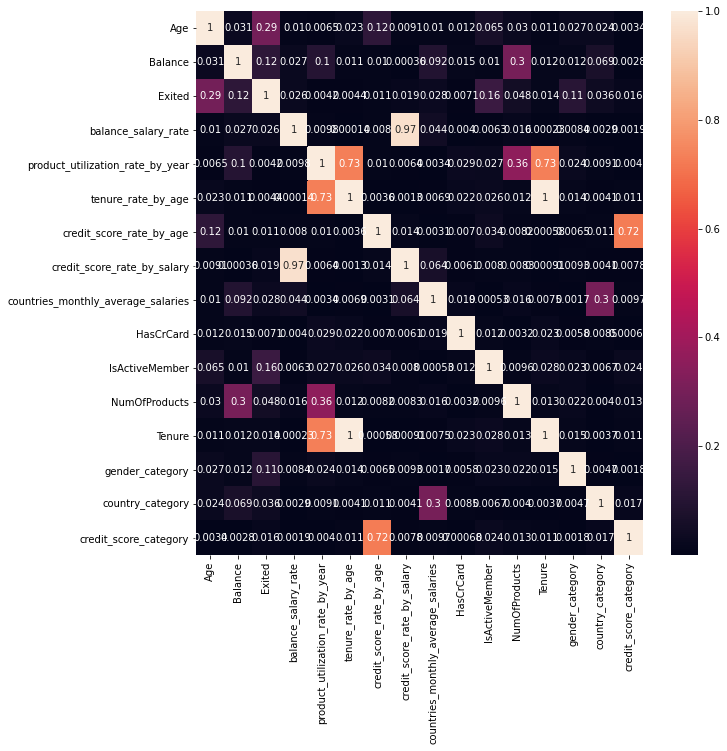

In [ ]:
# Now, let's see correlation graph:

correlation = df_encoded.corr().abs()
plt.figure(figsize=(10,10))
sns.heatmap(correlation, annot=True)
plt.show()

In [ ]:
# List of correlation scores:
print("List of Correlation Scores")
print("\n")

corrs_results = df_encoded.corrwith(df_encoded["Exited"]).abs().nlargest(24)

corrs_results

List of Correlation Scores




Exited                                1.000000
Age                                   0.294082
IsActiveMember                        0.156128
Balance                               0.118533
gender_category                       0.106512
NumOfProducts                         0.047820
country_category                      0.035943
countries_monthly_average_salaries    0.027788
balance_salary_rate                   0.025558
credit_score_rate_by_salary           0.019172
credit_score_category                 0.016412
Tenure                                0.014001
credit_score_rate_by_age              0.010877
HasCrCard                             0.007138
tenure_rate_by_age                    0.004365
product_utilization_rate_by_year      0.004165
dtype: float64

#4. Data Modeling & Evaluation

#Logistic Regression

In [ ]:
X = df_encoded[features].values
y = df_encoded['Exited']

# Training my model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=1)
log_reg = LogisticRegression(random_state=1, solver = 'lbfgs')

log_reg.fit(X_train, y_train)
# predict - Predict class labels for samples in X
log_reg.predict(X_train)
LR_y_pred = log_reg.predict(X_test)

# predict_proba - Probability estimates
LR_pred_proba = log_reg.predict_proba(X_train)

# Accuracy on Test
print("The Testing Accuracy is: ", log_reg.score(X_test, y_test))

# Classification Report
print(classification_report(y_train, LR_y_pred))



The Testing Accuracy is:  0.795
              precision    recall  f1-score   support

           0       0.80      1.00      0.89      3989
           1       0.00      0.00      0.00      1011

    accuracy                           0.80      5000
   macro avg       0.40      0.50      0.44      5000
weighted avg       0.64      0.80      0.71      5000



In [ ]:
#Hyper Parameter tuning to get the best C

kf = KFold(n_splits=3, random_state=0, shuffle=True)

# Logistic Reg CV
C_List = np.geomspace(1e-5, 1e5, num=20)
Log_reg3 = LogisticRegressionCV(random_state=15, Cs = C_List, solver ='lbfgs')
Log_reg3.fit(X_train, y_train)
print("The CA is:", Log_reg3.score(X_test, y_test))
pred_proba_t = Log_reg3.predict_proba(X_test)
log_loss3 = log_loss(y_test, pred_proba_t)

print("The optimal C parameter is: ", Log_reg3.C_)

The CA is: 0.795
The optimal C parameter is:  [0.000010]


Logistic Regression Hyperparameter Tuning results: {'Optimal C parameter': '0.000010'}
Logistic Regression Classifier (After Hyperparameter Tuning): 

              precision    recall  f1-score   support

    No Churn       0.79      1.00      0.88      1585
       Churn       1.00      0.00      0.00       415

    accuracy                           0.79      2000
   macro avg       0.90      0.50      0.44      2000
weighted avg       0.84      0.79      0.70      2000

---------------
Training Accuracy score: 0.7972
Testing Accuracy score: 0.793
Mean Absolute Error: 0.207
Mean Squared Error: 0.207
Root Mean Squared Error:0.455
--------------- 

Logistic Regression Confusion matrix

 [[1585    0]
 [ 414    1]]




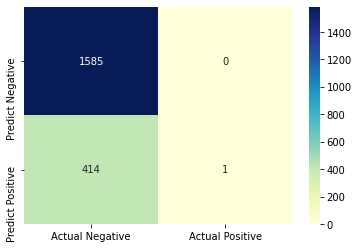

In [ ]:
# Training my model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)
log_reg = LogisticRegression(random_state=1, solver = 'lbfgs', C = 0.000010)

log_reg.fit(X_train, y_train)
# predict - Predict class labels for samples in X
log_reg.predict(X_train)
LR_y_pred = log_reg.predict(X_test)

# predict_proba - Probability estimates
LR_pred_proba = log_reg.predict_proba(X_train)


print("Logistic Regression Hyperparameter Tuning results: {'Optimal C parameter': '0.000010'}")
print("Logistic Regression Classifier (After Hyperparameter Tuning):", "\n")
print(classification_report(y_test, LR_y_pred, target_names=['No Churn', 'Churn']))
print("---------------")
print("Training Accuracy score: "+str(round(accuracy_score(y_train,log_reg.predict(X_train)),4)))
print("Testing Accuracy score: "+str(round(accuracy_score(y_test,log_reg.predict(X_test)),4)))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, LR_y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, LR_y_pred))
print('Root Mean Squared Error:'+str(round(np.sqrt(metrics.mean_squared_error(y_test, LR_y_pred)),4)))
print("---------------","\n")

cm = confusion_matrix(y_test, LR_y_pred)
print('Logistic Regression Confusion matrix\n\n', cm)
print('\n')
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Negative', 'Actual Positive'], 
                        index=['Predict Negative', 'Predict Positive'])
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')
plt.show()

#Decision Tree

In [ ]:
# Decision Tree

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1,test_size=0.2)
dt =  DecisionTreeClassifier()
dt =  dt.fit(X_train,y_train)
dt_y_pred = dt.predict(X_test)
print('Accuracy:',metrics.accuracy_score(y_test,dt_y_pred))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, dt_y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, dt_y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, dt_y_pred)))

Accuracy: 0.797
Mean Absolute Error: 0.203
Mean Squared Error: 0.203
Root Mean Squared Error: 0.4505552130427524


In [ ]:
# Hyperparameter Tuning for DT
# make a list of all possible parameters to put into the model
param_dist = {
    "criterion":["gini","entropy"],
    "max_depth" : [1,2,3,4,5,6,7,8,9,10,11,12,None]
}

grid = GridSearchCV(dt,param_grid=param_dist,cv=10,n_jobs=1)

grid.fit(X_train,y_train)

print('Best Score:',grid.best_score_)
print('Best Parameters to use:',grid.best_params_)

Best Score: 0.853875
Best Parameters to use: {'criterion': 'entropy', 'max_depth': 5}


Decision Tree Hyperparameter Tuning results: {'criterion': 'entropy', 'max_depth': 5}
Decision Tree Classifier (After Hyperparameter Tuning): 

              precision    recall  f1-score   support

    No Churn       0.86      0.97      0.91      1585
       Churn       0.80      0.40      0.53       415

    accuracy                           0.85      2000
   macro avg       0.83      0.69      0.72      2000
weighted avg       0.85      0.85      0.83      2000

---------------
Training Accuracy score: 0.8599
Testing Accuracy score: 0.854
Mean Absolute Error: 0.146
Mean Squared Error: 0.146
Root Mean Squared Error:0.3821
--------------- 

Decision Tree Confusion matrix

 [[1543   42]
 [ 250  165]]




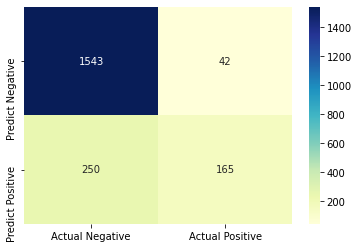

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1,test_size=0.2)
dt =  DecisionTreeClassifier(criterion = 'entropy', max_depth = 5 )
dt =  dt.fit(X_train,y_train)
dt_y_pred = dt.predict(X_test)

print("Decision Tree Hyperparameter Tuning results: {'criterion': 'entropy', 'max_depth': 5}")
print("Decision Tree Classifier (After Hyperparameter Tuning):", "\n")
print(classification_report(y_test, dt_y_pred, target_names=['No Churn', 'Churn']))
print("---------------")
print("Training Accuracy score: "+str(round(accuracy_score(y_train,dt.predict(X_train)),4)))
print("Testing Accuracy score: "+str(round(accuracy_score(y_test,dt.predict(X_test)),4)))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, dt_y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, dt_y_pred))
print('Root Mean Squared Error:'+str(round(np.sqrt(metrics.mean_squared_error(y_test, dt_y_pred)),4)))
print("---------------","\n")

cm = confusion_matrix(y_test, dt_y_pred)
print('Decision Tree Confusion matrix\n\n', cm)
print('\n')
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Negative', 'Actual Positive'], 
                        index=['Predict Negative', 'Predict Positive'])
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')
plt.show()


#K-Nearest Neighbours

In [ ]:
#K nearest neighbours 
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

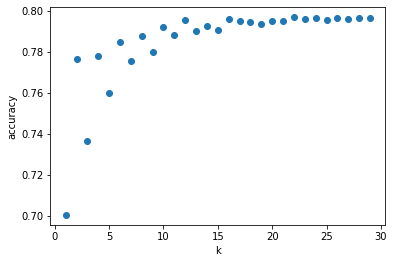

In [ ]:
# K is user specified , how do we know which K is the best to use ? 
k_range = range(1,30)
scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_test, y_test))

plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, scores)
plt.xticks([0,5,10,15,20, 25,30]);

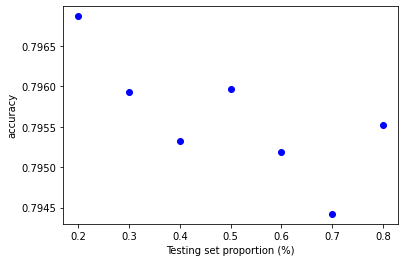

In [ ]:
#these are a list of various different splitting which can be done, which testing to use ?
t = [0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2]

#the k value we got from the previous graph, to put here
knn = KNeighborsClassifier(n_neighbors = 25)
plt.figure()

for s in t:

    scores = []
    for i in range(1,20):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = s)
        knn.fit(X_train, y_train)
        scores.append(knn.score(X_test, y_test))
    plt.plot(s, np.mean(scores), 'bo')

plt.xlabel('Testing set proportion (%)')
plt.ylabel('accuracy');

KNeighbors Hyperparameter Tuning results: {'n_neighbours': '25'}
KNeighbors Classifier (After Hyperparameter Tuning): 

              precision    recall  f1-score   support

    No Churn       0.80      1.00      0.89      1595
       Churn       0.25      0.00      0.01       405

    accuracy                           0.80      2000
   macro avg       0.52      0.50      0.45      2000
weighted avg       0.69      0.80      0.71      2000

---------------
Training Accuracy score: 0.7964
Testing Accuracy score: 0.7955
Mean Absolute Error: 0.2045
Mean Squared Error: 0.2045
Root Mean Squared Error:0.4522
--------------- 

KNeighbors Confusion matrix

 [[1589    6]
 [ 403    2]]




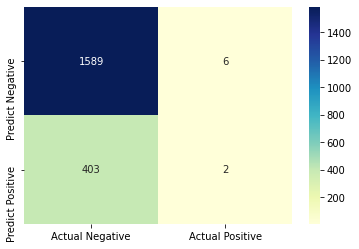

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0,test_size=0.2)

knn = KNeighborsClassifier(n_neighbors = 25)
knn.fit(X_train, y_train)
y_predict = knn.predict(X_test)

print("KNeighbors Hyperparameter Tuning results: {'n_neighbours': '25', 'test_size': '0.2'}")
print("KNeighbors Classifier (After Hyperparameter Tuning):", "\n")
print(classification_report(y_test, y_predict, target_names=['No Churn', 'Churn']))
print("---------------")
print("Training Accuracy score: "+str(round(accuracy_score(y_train,knn.predict(X_train)),4)))
print("Testing Accuracy score: "+str(round(accuracy_score(y_test,knn.predict(X_test)),4)))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_predict))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_predict))
print('Root Mean Squared Error:'+str(round(np.sqrt(metrics.mean_squared_error(y_test, y_predict)),4)))
print("---------------","\n")

cm = confusion_matrix(y_test, y_predict)
print('KNeighbors Confusion matrix\n\n', cm)
print('\n')
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Negative', 'Actual Positive'], 
                        index=['Predict Negative', 'Predict Positive'])
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')
plt.show()


#5. Deployment

> Picking the best model



In [ ]:
# Decision Tree (Best Model)

from sklearn.metrics import classification_report, confusion_matrix

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1,test_size=0.2)
dt =  DecisionTreeClassifier(criterion = 'entropy', max_depth = 6 )
dt =  dt.fit(X_train,y_train)
dt_y_pred = dt.predict(X_test)

print(confusion_matrix(y_test, dt_y_pred))
print("\n")
print(classification_report(y_test, dt_y_pred))
print("\n")
print ('Decision Tree RMSE:', mean_squared_error(y_predict, y_test) ** 0.5)
print('Decision Tree Accuracy Score:', metrics.accuracy_score(y_test,dt_y_pred))


[[1533   52]
 [ 241  174]]


              precision    recall  f1-score   support

           0       0.86      0.97      0.91      1585
           1       0.77      0.42      0.54       415

    accuracy                           0.85      2000
   macro avg       0.82      0.69      0.73      2000
weighted avg       0.84      0.85      0.84      2000



Decision Tree RMSE: 0.48733971724044817
Decision Tree Accuracy Score: 0.8535


Decision Tree is chosen as the best model and it has the best accuracy of 85%, meaning the model is able to predict 85% of the outcomes correctly.

Terms: 

*   Churner = Customer who left the banking company
*   Non-Churner = Customer who did not leave or stay with the banking company

Precision is the ratio of correctly predicted positive observations to the total predicted positive observations.
In this context it means, out of all the customers labeled as churners, how many are actually churners or non-churners?

*   Precision shows that it is 77% (1) precised to predict actual churners out of all the customers labeled as churners.
*   Precision shows that it is 86% (0) precised to predict actual non-churners out of all the customers labeled as non-churners.

Recall is the ratio of correctly predicted positive observations to the all observations in actual class. In this context it means: Out of all the customers who ARE churners, how many of them did we guess correctly? Same goes for customers who ARE non-churners

*   Recall (Sensitivity) shows that the model is 42% (1) likely to predict actual positive results 
*   Recall (Sensitivity) shows that the model is 97% (0) likely to predict actual negative results 


Summary

*   Precision is used when False Positive is important.
*   Recall i used when False negative is important.
*   False positive in this context means that i identify you as a churner, even though you are not a churner.
*   False negative in this context means that i identify you as a non-churner, even though you are not a churner. (these two parts not sure) 


Hence, Which is more costly? 

Answer: Losing a potential non-churner, because we do not want customers to churn/leave the banking company, Therefore, we need to make sure the Recall is high.